# Urban Mobility Optimization and Prediction

## 1. Introduction
This project aims to analyze and predict urban mobility patterns to help city planners and transportation companies optimize transportation services and reduce congestion.

### Objectives
- Predict urban mobility patterns
- Identify congestion points and peak usage times
- Optimize transportation routes and schedules

## 2. Data Understanding and Preparation
### 2.1 Import Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import geopandas as gpd

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

### 2.2 Load Dataset

In [13]:
df = pd.read_csv('urban_mobility_dataset.csv')
df.head()

,timestamp,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents
0,2023-01-01 00:00:00,292,3681,296,1939,Clear,Sunday,0,NaN,24.547380,29,0,5.263106,22,4
1,2023-01-01 01:00:00,340,4743,96,688,Snow,Sunday,0,NaN,31.801722,99,3,0.523627,88,2
2,2023-01-01 02:00:00,372,3491,183,1774,Rain,Sunday,0,NaN,0.052832,34,6,0.408793,93,2
3,2023-01-01 03:00:00,365,4360,214,24,Rain,Sunday,0,NaN,-3.757874,41,4,27.640844,89,3
4,2023-01-01 04:00:00,226,121,247,224,Snow,Sunday,0,NaN,-4.948219,45,3,14.820891,49,3


### 2.3 Data Exploration

In [14]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 15 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   timestamp               1000000 non-null  object 
 1   public_transport_usage  1000000 non-null  int64  
 2   traffic_flow            1000000 non-null  int64  
 3   bike_sharing_usage      1000000 non-null  int64  
 4   pedestrian_count        1000000 non-null  int64  
 5   weather_conditions      1000000 non-null  object 
 6   day_of_week             1000000 non-null  object 
 7   holiday                 1000000 non-null  int64  
 8   event                   200513 non-null   object 
 9   temperature             1000000 non-null  float64
 10  humidity                1000000 non-null  int64  
 11  road_incidents          1000000 non-null  int64  
 12  public_transport_delay  1000000 non-null  float64
 13  bike_availability       1000000 non-null  int64  
 14  ped

timestamp                      0
public_transport_usage         0
traffic_flow                   0
bike_sharing_usage             0
pedestrian_count               0
weather_conditions             0
day_of_week                    0
holiday                        0
event                     799487
temperature                    0
humidity                       0
road_incidents                 0
public_transport_delay         0
bike_availability              0
pedestrian_incidents           0
dtype: int64

### 2.4 Data Cleaning

In [15]:
df['event'] = df['event'].fillna('None')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek

df.head()

,timestamp,public_transport_usage,traffic_flow,bike_sharing_usage,pedestrian_count,weather_conditions,day_of_week,holiday,event,temperature,humidity,road_incidents,public_transport_delay,bike_availability,pedestrian_incidents,hour
0,2023-01-01 00:00:00,292,3681,296,1939,Clear,6,0,None,24.547380,29,0,5.263106,22,4,0
1,2023-01-01 01:00:00,340,4743,96,688,Snow,6,0,None,31.801722,99,3,0.523627,88,2,1
2,2023-01-01 02:00:00,372,3491,183,1774,Rain,6,0,None,0.052832,34,6,0.408793,93,2,2
3,2023-01-01 03:00:00,365,4360,214,24,Rain,6,0,None,-3.757874,41,4,27.640844,89,3,3
4,2023-01-01 04:00:00,226,121,247,224,Snow,6,0,None,-4.948219,45,3,14.820891,49,3,4


## 3. Exploratory Data Analysis

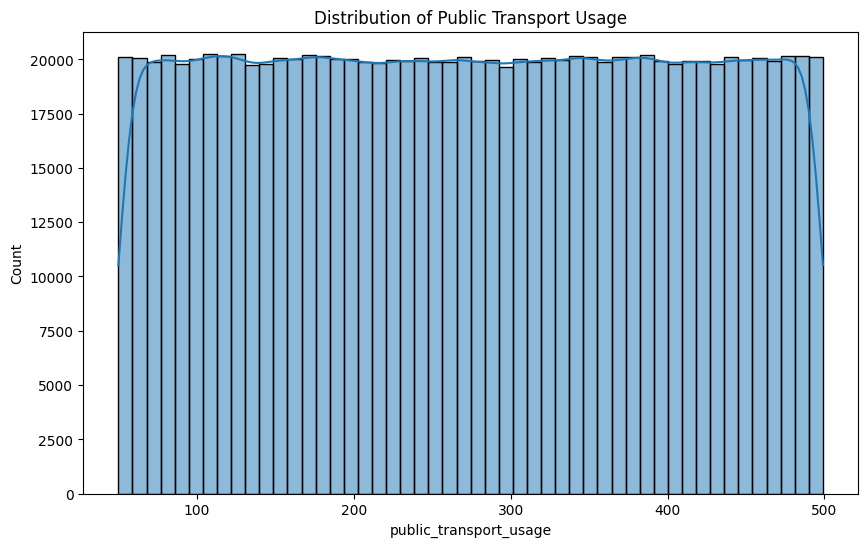

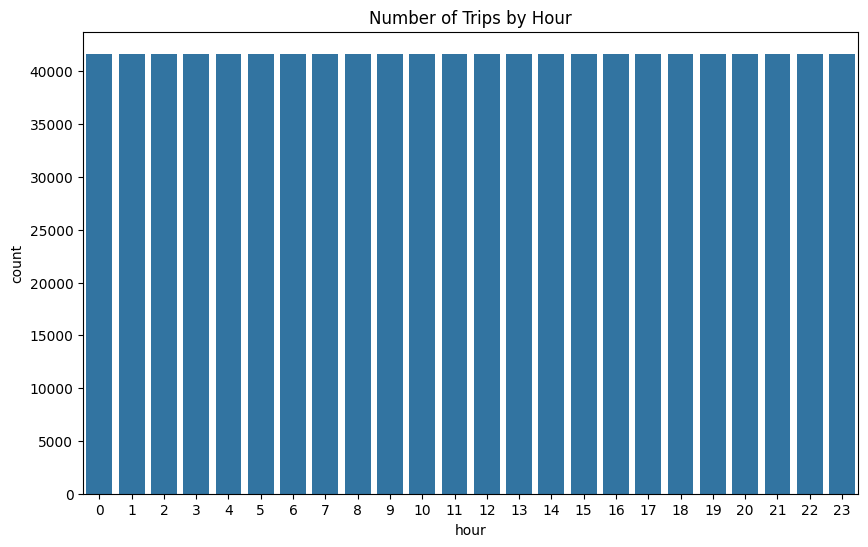

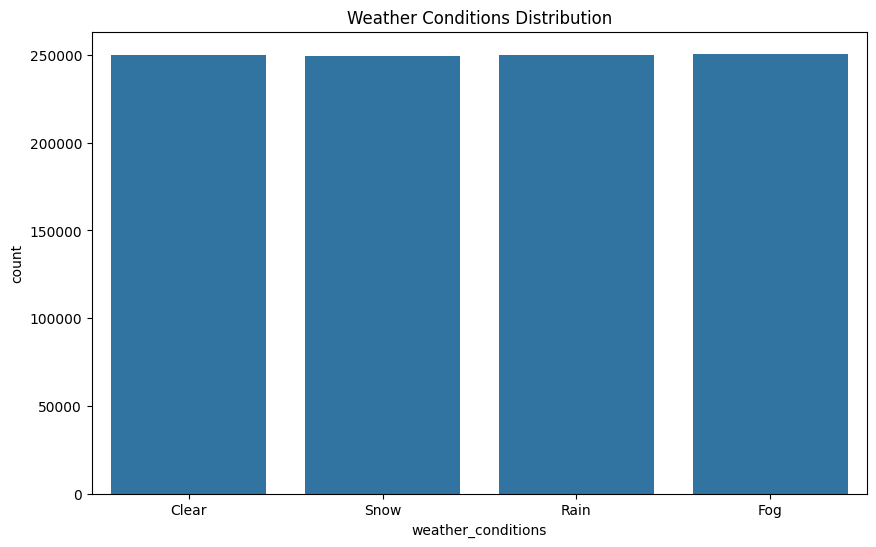

In [16]:
# Visualize mobility patterns
plt.figure(figsize=(10, 6))
sns.histplot(df['public_transport_usage'], bins=50, kde=True)
plt.title('Distribution of Public Transport Usage')
plt.show()

# Peak hours analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', data=df)
plt.title('Number of Trips by Hour')
plt.show()

# Weather conditions analysis
plt.figure(figsize=(10, 6))
sns.countplot(x='weather_conditions', data=df)
plt.title('Weather Conditions Distribution')
plt.show()
